# Heart Disease Prediction Project

The Heart Disease Prediction Project utilizes scikit-learn to predict heart disease likelihood based on medical attributes. It preprocesses data, selects and trains model like KNearestNeighbor, evaluates performance, and tune hyperparameters for optimal results. The project aids in early detection and prevention, benefiting healthcare professionals and individuals alike.

#### Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
import plotly.express as px

#### Importing the heart disease dataset

In [2]:
# Importing the csv file to a dataframe object.

heart_data = pd.read_csv('heart.csv')
heart_data.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

#### Data quality assurance and munging

In [3]:
print(heart_data.info())
print('\n', heart_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115 

#### Another dataframe object for data visualization

In [4]:
plot_data = heart_data.sort_values('Age').reset_index(drop='True')
plot_data[:5]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   28   M           ATA        130          132          0        LVH    185   
1   29   M           ATA        140          263          0     Normal    170   
2   29   M           ATA        120          243          0     Normal    160   
3   29   M           ATA        130          204          0        LVH    202   
4   30   F            TA        170          237          0         ST    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      0.0       Up             0  
2              N      0.0       Up             0  
3              N      0.0       Up             0  
4              N      0.0       Up             0

#### Number of people having heart diseases in different age groups

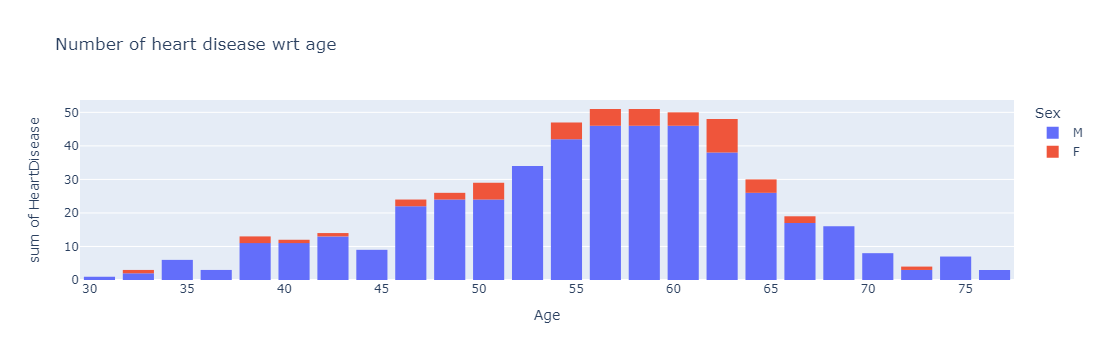

In [5]:
fig = px.histogram(plot_data, x="Age", y="HeartDisease", color="Sex",
           hover_name="ChestPainType", height=600, title='Number of heart disease wrt age')
fig.update_layout(bargap=0.2)
fig.show()

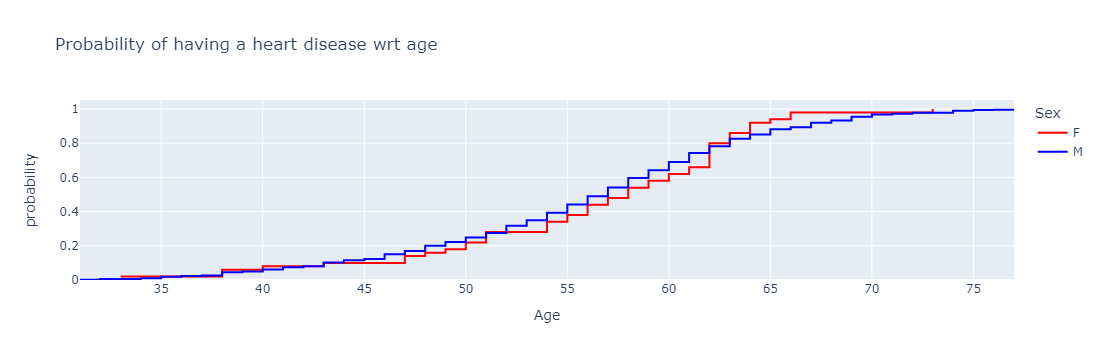

In [6]:
fig = px.ecdf(heart_data.query('HeartDisease==1'), x="Age", color="Sex", color_discrete_sequence=['Red', 'Blue'], 
              height=600, title='Probability of having a heart disease wrt age')
fig.show()

#### Scatter plot showing number of people with maximum heart rate in certain age group

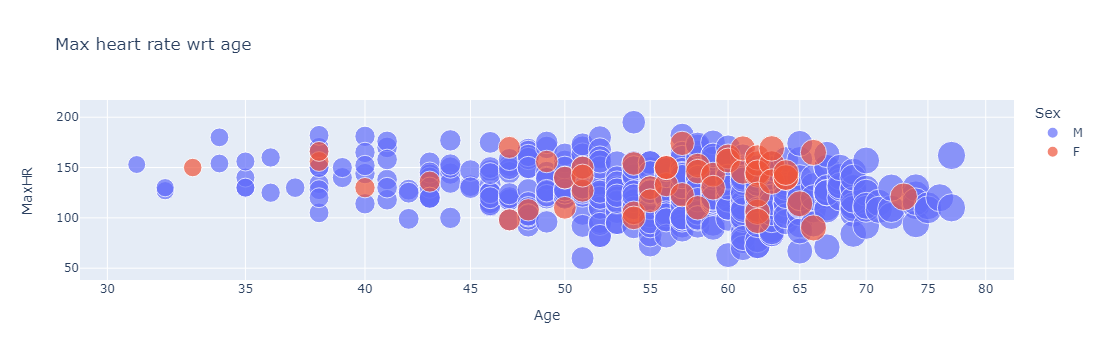

In [7]:
fig = px.scatter(plot_data.query("HeartDisease==1"), x="Age", y="MaxHR", size="Age", color="Sex",
           hover_name="ChestPainType", log_x=True, size_max=20, height=600, title='Max heart rate wrt age')
fig.show()

#### Estimating the segment of the people having heart disease

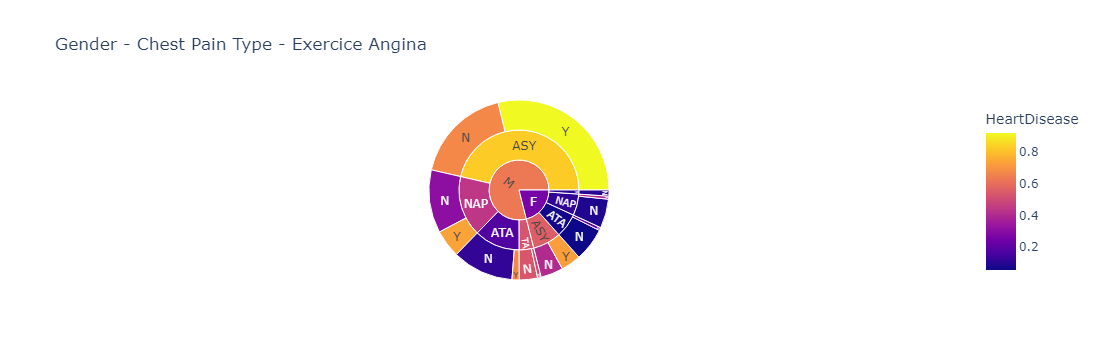

In [8]:
fig = px.sunburst(heart_data, path=['Sex', 'ChestPainType', 'ExerciseAngina'], color='HeartDisease', height=700,
                  title='Gender - Chest Pain Type - Exercice Angina')
fig.show()

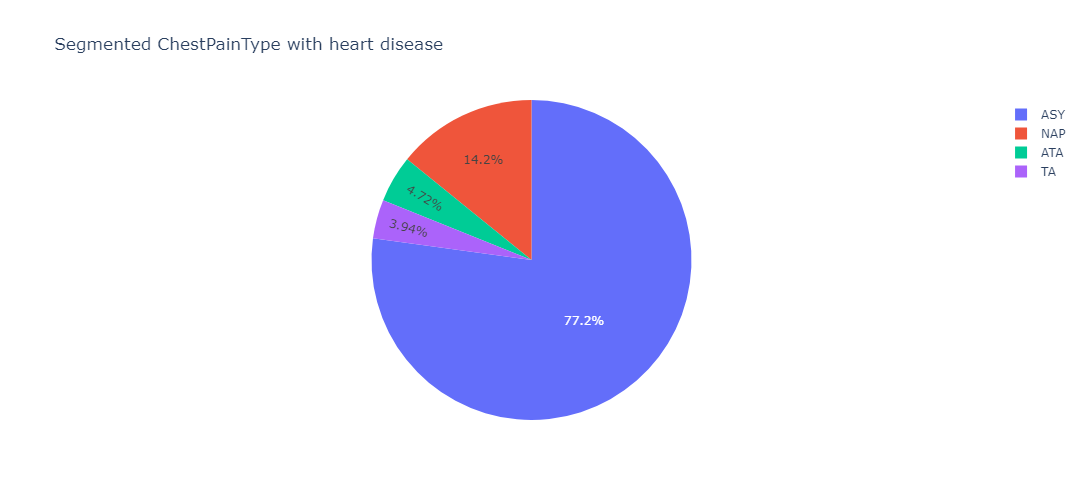

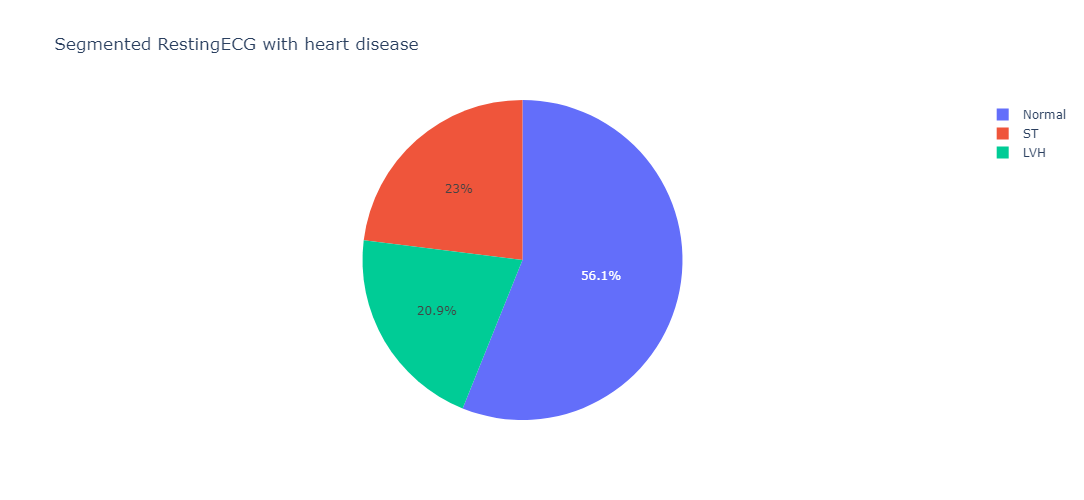

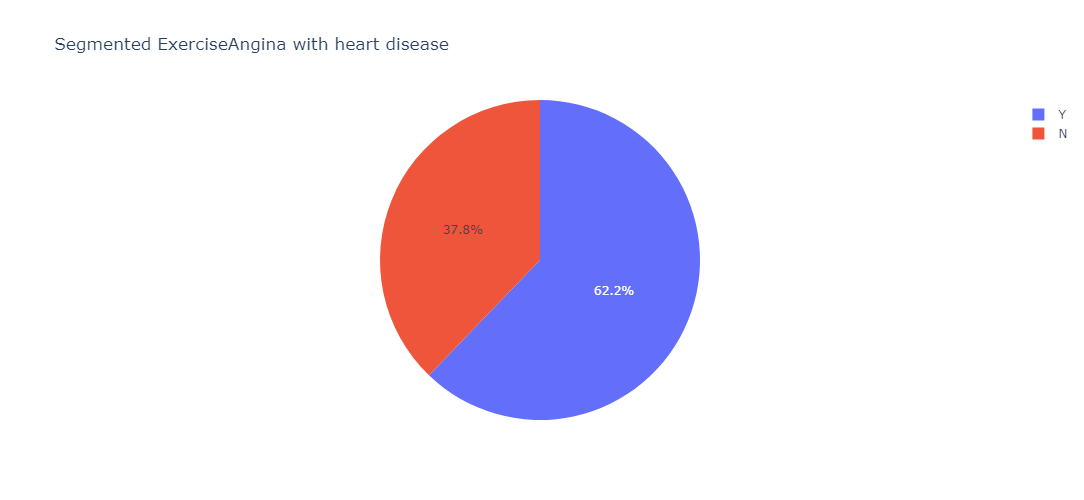

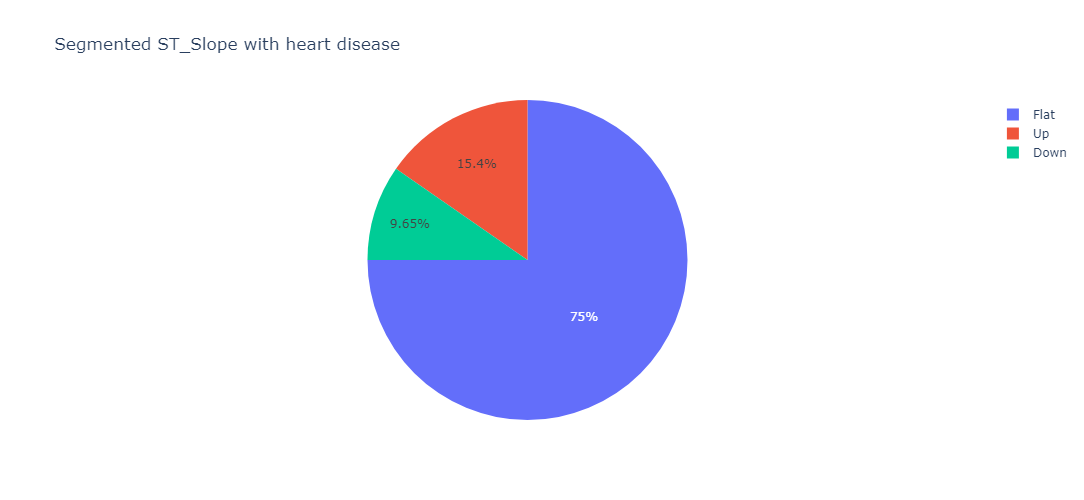

In [9]:
for cat in heart_data[['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]:
    fig = px.pie(heart_data.query('HeartDisease == 1'), values='HeartDisease', names=cat,
             title=f'Segmented {cat} with heart disease', height=500)
    fig.show()

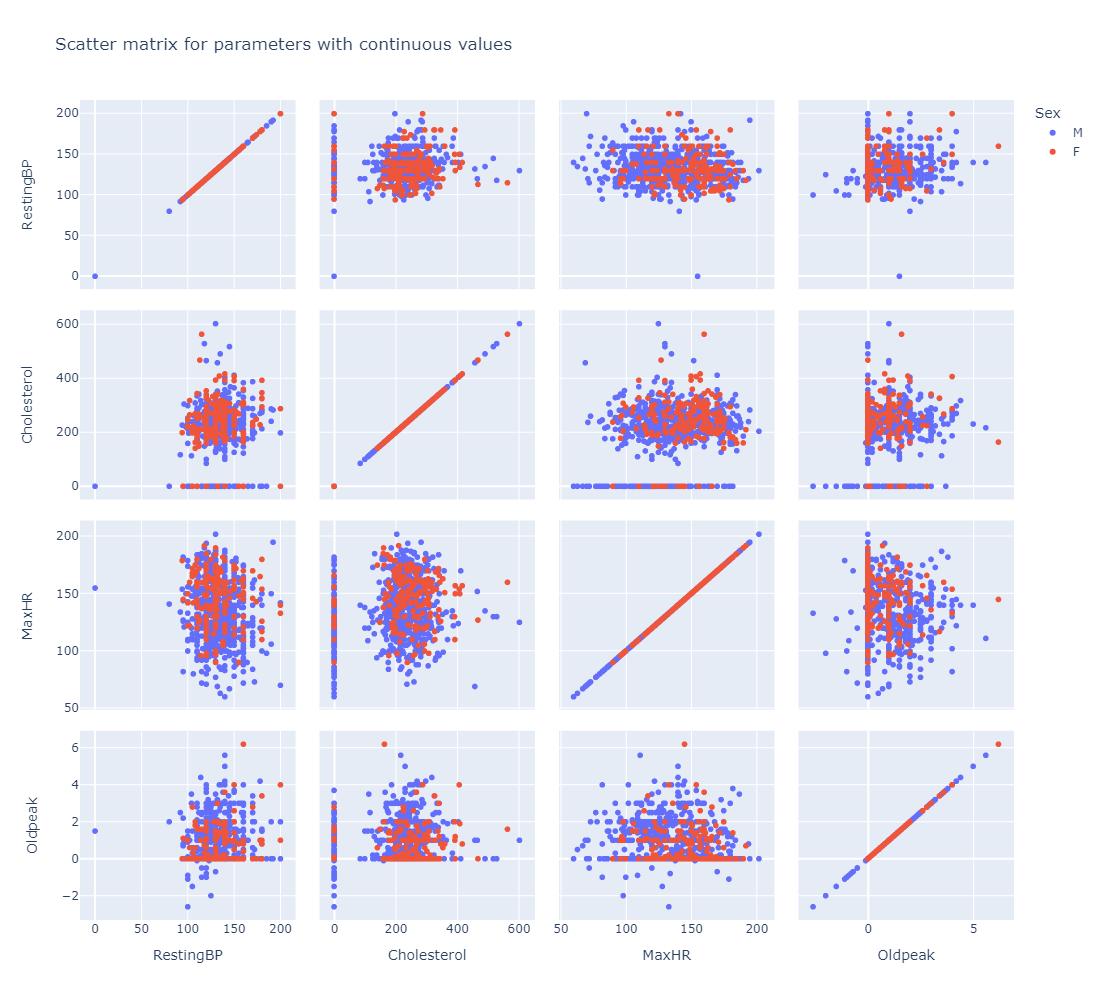

In [10]:
fig = px.scatter_matrix(heart_data, dimensions=['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], color="Sex", height=1000,
                       title='Scatter matrix for parameters with continuous values')
fig.show()

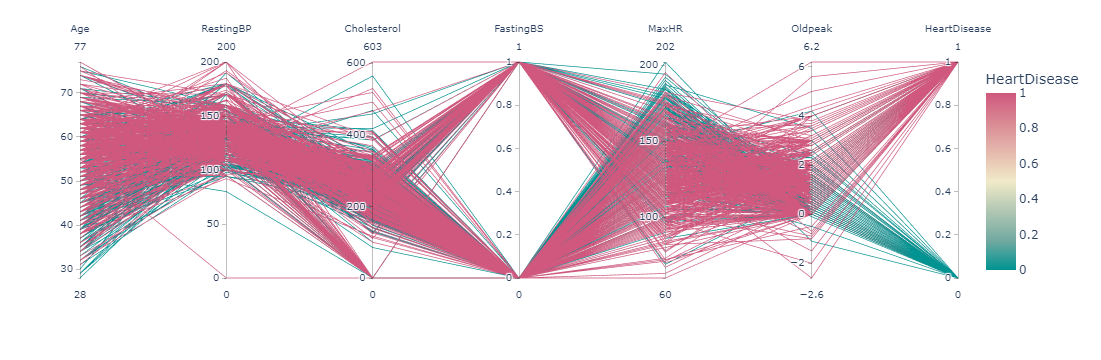

In [11]:
fig = px.parallel_coordinates(heart_data, color="HeartDisease", height=500,
                    color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

#### Dataframe object to numpy array

In [12]:
x = heart_data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
                'ExerciseAngina', 'Oldpeak', 'ST_Slope']].values
x[:5]

array([[40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', 160, 180, 0, 'Normal', 156, 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', 130, 283, 0, 'ST', 98, 'N', 0.0, 'Up'],
       [48, 'F', 'ASY', 138, 214, 0, 'Normal', 108, 'Y', 1.5, 'Flat'],
       [54, 'M', 'NAP', 150, 195, 0, 'Normal', 122, 'N', 0.0, 'Up']],
      dtype=object)

#### Typecasting object into continuous values

In [13]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
x[:, 1] = le_sex.transform(x[:, 1])

le_chestpaintype = preprocessing.LabelEncoder()
le_chestpaintype.fit(['TA', 'ATA', 'NAP', 'ASY'])
x[:, 2] = le_chestpaintype.transform(x[:, 2])

le_restingecg = preprocessing.LabelEncoder()
le_restingecg.fit(['Normal', 'ST', 'LVH'])
x[:, 6] = le_restingecg.transform(x[:, 6])

le_exerciseangina = preprocessing.LabelEncoder()
le_exerciseangina.fit(['Y', 'N'])
x[:, 8] = le_exerciseangina.transform(x[:, 8])

le_stslope = preprocessing.LabelEncoder()
le_stslope.fit(['Up', 'Flat', 'Down'])
x[:, 10] = le_stslope.transform(x[:, 10])

x[:5]

array([[40, 1, 1, 140, 289, 0, 1, 172, 0, 0.0, 2],
       [49, 0, 2, 160, 180, 0, 1, 156, 0, 1.0, 1],
       [37, 1, 1, 130, 283, 0, 2, 98, 0, 0.0, 2],
       [48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1],
       [54, 1, 2, 150, 195, 0, 1, 122, 0, 0.0, 2]], dtype=object)

### Split data into features and target variable

#### Standardizing features

StandardScaler is applied in k-Nearest Neighbors (kNN) primarily to ensure that all features contribute equally to the distance calculation. By standardizing feature scales to have a mean of 0 and a standard deviation of 1, StandardScaler prevents features with larger scales from dominating the distance computation, thus improving the fairness of the algorithm.

In [14]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[:5]

array([[-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
        -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.47848359, -1.93816322,  1.27505906,  1.49175234, -0.17196105,
        -0.55134134,  0.01725451,  0.75415714, -0.8235563 ,  0.10566353,
        -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, -0.12951283,  0.7701878 ,
        -0.55134134,  1.60121899, -1.52513802, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.5845565 , -1.93816322, -0.81699495,  0.30282455,  0.13903954,
        -0.55134134,  0.01725451, -1.13215609,  1.21424608,  0.57471149,
        -0.59607813],
       [ 0.05188098,  0.51595242,  1.27505906,  0.95133062, -0.0347549 ,
        -0.55134134,  0.01725451, -0.5819814 , -0.8235563 , -0.83243239,
         1.05211381]])

In [15]:
y = heart_data['HeartDisease'].values
y[:5]

array([0, 1, 0, 1, 0], dtype=int64)

#### Split data into training and testing sets
##### 80% for training and 20% for testing

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 3)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(734, 11) (734,) (184, 11) (184,)


#### Initializing and training the KNN classifier

In [17]:
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn

KNeighborsClassifier()

In [18]:
neigh = knn.fit(train_x, train_y)
neigh

KNeighborsClassifier()

#### Making predictions for the test set

In [19]:
test_y_ = neigh.predict(test_x)
print(test_y_[:5], test_y[:5])

[1 1 1 1 0] [1 1 1 1 0]


#### Evaluate model performance

In [20]:
print("Accuracy of Test set = ", metrics.accuracy_score(test_y, test_y_))
print("Accuracy of Train set = ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
report = metrics.classification_report(test_y, test_y_)
print(report)

Accuracy of Test set =  0.8913043478260869
Accuracy of Train set =  0.8828337874659401
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        86
           1       0.91      0.88      0.90        98

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



#### Adjusting value of n neighbor

In [21]:
ks = 20
mean_acc = np.zeros(ks-1)

for i in range(1, ks):
    neigh1 = KNeighborsClassifier(n_neighbors = i).fit(train_x, train_y)
    test_y_ = neigh1.predict(test_x)
    mean_acc[i-1] = metrics.accuracy_score(test_y, test_y_)

mean_acc

array([0.81521739, 0.82608696, 0.8423913 , 0.85326087, 0.89130435,
       0.875     , 0.89130435, 0.86956522, 0.875     , 0.875     ,
       0.88043478, 0.88586957, 0.88043478, 0.875     , 0.86956522,
       0.88043478, 0.875     , 0.88043478, 0.88043478])

In [22]:
mean_acc.max()

0.8913043478260869

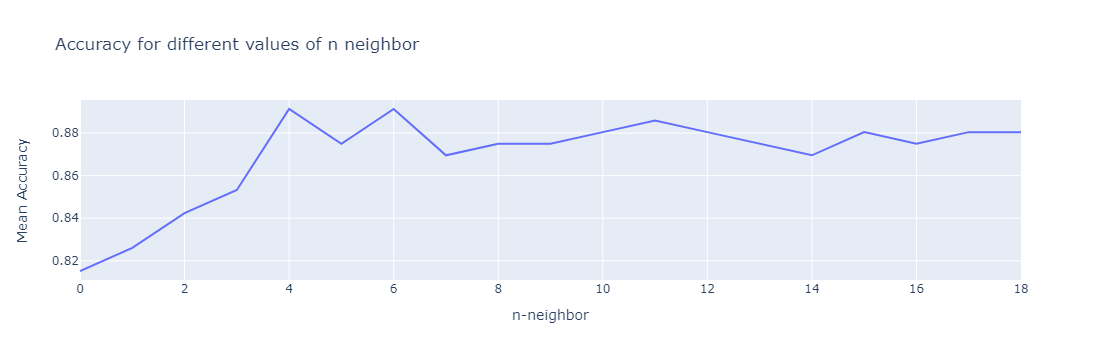

In [23]:
fig = px.line(mean_acc, height=600, title='Accuracy for different values of n neighbor')
fig.update_layout(
    xaxis_title="n-neighbor",
    yaxis_title="Mean Accuracy",
    showlegend = False
)
fig.show()

#### Exporting the final model

In [ ]:
joblib.dump(neigh, 'heart_final_model.sav')